In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.

from citipy import citipy


In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
    citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

nishihara jp
san jose gt
ushuaia ar
chake chake tz
careiro da varzea br
cape town za
ponta do sol cv
lorengau pg
rikitea pf
bissora gw
busselton au
rikitea pf
yamada jp
busselton au
taolanaro mg
albany au
samana do
provideniya ru
atuona pf
hamilton bm
naftah tn
bengkulu id
ponta do sol cv
mufulira zm
cape town za
port elizabeth za
hobart au
cayenne gf
louisbourg ca
atuona pf
barentsburg sj
castro cl
geraldton au
cape town za
norman wells ca
atuona pf
jamestown sh
puerto ayora ec
ushuaia ar
buala sb
cape town za
rikitea pf
busselton au
yulara au
rikitea pf
albany au
etchoropo mx
mataura pf
saint-philippe re
kibre mengist et
rikitea pf
barentsburg sj
port macquarie au
yar-sale ru
kodiak us
hobart au
new norfolk au
hilo us
takoradi gh
victoria sc
bouna ci
dingle ie
kavieng pg
hasaki jp
hilo us
geraldton au
vaini to
georgetown sh
petropavlovka ru
qesarya il
phalaborwa za
punta arenas cl
havelock us
punta arenas cl
hilo us
pecs hu
marcona pe
illoqqortoormiut gl
aksu kz
busselton au
tsihombe

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        # Print the city count to confirm sufficient count.
print(len(cities))

604


In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

#basic URL for openweathermap info
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Country": city_country,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nishihara
Processing Record 2 of Set 1 | san jose
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | chake chake
Processing Record 5 of Set 1 | careiro da varzea
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | ponta do sol
Processing Record 8 of Set 1 | lorengau
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | bissora
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | yamada
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | samana
Processing Record 16 of Set 1 | provideniya
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | hamilton
Processing Record 19 of Set 1 | naftah
City not found. Skipping...
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | mufulira
Processing Record 22 o

In [11]:
print(len(cities))

604


In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Nishihara,JP,26.1842,127.7558,72.68,89,75,0.00,2021-10-24 20:15:55
1,San Jose,US,37.3394,-121.8950,65.48,85,90,1.01,2021-10-24 20:19:25
2,Ushuaia,AR,-54.8000,-68.3000,33.46,93,75,28.77,2021-10-24 20:14:21
3,Chake Chake,TZ,-5.2459,39.7666,75.81,83,5,6.26,2021-10-24 20:23:07
4,Careiro Da Varzea,BR,-3.2003,-59.8119,93.83,58,92,4.70,2021-10-24 20:23:07
5,Cape Town,ZA,-33.9258,18.4232,60.28,69,0,5.01,2021-10-24 20:11:47
6,Ponta Do Sol,PT,32.6667,-17.1000,70.72,71,77,6.44,2021-10-24 20:15:57
7,Lorengau,PG,-2.0226,147.2712,80.13,82,92,8.12,2021-10-24 20:18:45
8,Rikitea,PF,-23.1203,-134.9692,74.70,72,23,17.83,2021-10-24 20:15:17
9,Bissora,GW,12.2231,-15.4475,78.69,88,100,5.26,2021-10-24 20:23:08


In [18]:
city_data_df_sorted = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[city_data_df_sorted ]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nishihara,JP,2021-10-24 20:15:55,26.1842,127.7558,72.68,89,75,0.00
1,San Jose,US,2021-10-24 20:19:25,37.3394,-121.8950,65.48,85,90,1.01
2,Ushuaia,AR,2021-10-24 20:14:21,-54.8000,-68.3000,33.46,93,75,28.77
3,Chake Chake,TZ,2021-10-24 20:23:07,-5.2459,39.7666,75.81,83,5,6.26
4,Careiro Da Varzea,BR,2021-10-24 20:23:07,-3.2003,-59.8119,93.83,58,92,4.70
...,...,...,...,...,...,...,...,...,...
545,Devin,BG,2021-10-24 20:25:07,41.7433,24.4000,45.50,93,7,3.69
546,Akyab,MM,2021-10-24 20:16:11,20.1500,92.9000,76.55,76,93,4.21
547,Tucurui,BR,2021-10-24 20:25:07,-3.7661,-49.6725,87.62,61,100,3.56
548,Margate,GB,2021-10-24 20:25:08,51.3813,1.3862,56.97,82,87,1.99


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

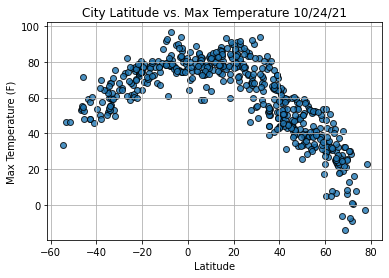

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

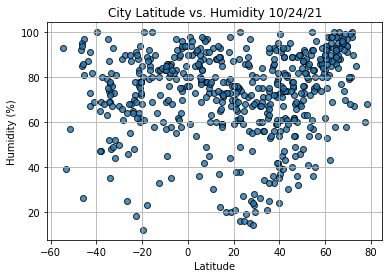

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


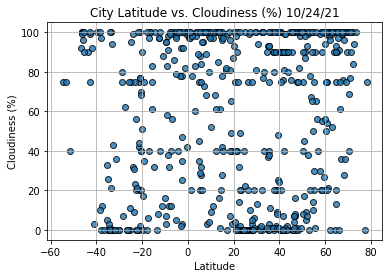

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

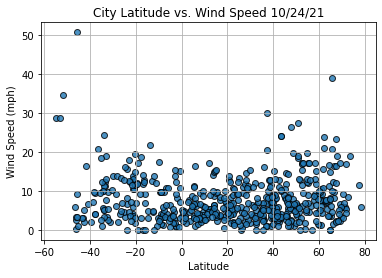

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()